**Задание**
Цель: изучить применение дерева решений в рамках задачи регрессии

**Описание задания:**

В домашнем задании нужно решить задачу регрессии. В качестве датасета необходимо взять данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR). На полученных данных построить модель регрессии и дерево решений.

**Этапы работы:**

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).

2. Проведите первичный анализ.

  a. Проверьте данные на пропуски. Удалите в случае обнаружения.

  b.*Нормализуйте один из признаков.

3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

4. Обучите модель регрессии на обучающем множестве.

5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.

6. Обучите дерево решений на обучающем множестве.

  a. Повторите п. 5 для полученной модели.

  b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке.

7. Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.

  a. Повторите п. 5 для полученной модели.

8. Сформулируйте выводы по проделанной работе.

  a. Сравните точность двух моделей.

  b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?

Для получения зачета по этому домашнему заданию, должно быть как минимум реализовано обучение двух моделей, выведена их точность, оптимизирован один параметр дерева решений.

**1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_california_housing

In [ ]:
# Исходный набор данных:
data = fetch_california_housing()

**2. Проведите первичный анализ.**

  **a. Проверьте данные на пропуски. Удалите в случае обнаружения.**

In [ ]:
# Датасет признаков и серия значений целевой переменной:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


Пропусков нет, все признаки - числовые.

Датасет уже знаком по предыдущей работе. В нем есть пары признаков, которые коррелируют между собой. Присутствуют значения признаков, которые можно отнести к выбросам. Для построения качественной модели линейной регрессии предварительная подготовка (удаление выбросов, коррелирующих признаков, т.д.) была бы необходима, но для построения дерева решений она менее критична (критичны пропуски и категориальные переменные, но того и другого нет).

  **b.*Нормализуйте один из признаков.**

In [ ]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


Нормализуем признак 'Population', т.к. значения, которые он принимает для большинства объектов сильно превышают значения остальных признаков. Воспользуемся инструментом MinMaxScaler библиотеки sklearn.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_p = pd.DataFrame(X['Population'])

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_p)

MinMaxScaler()

In [ ]:
X_p_st = scaler.transform(X_p)
X_p_st[:3]

array([[0.00894083],
       [0.0672104 ],
       [0.01381765]])

In [ ]:
# В датасете X заменим исходный столбец 'Population' столбцом с нормализованными значениями:
X['Population'] = X_p_st

In [ ]:
X.rename(columns = {'Population':'Population_norm'}, inplace=True)
X[:3]

,MedInc,HouseAge,AveRooms,AveBedrms,Population_norm,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,0.008941,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,0.067210,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,0.013818,2.802260,37.85,-122.24


**3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

**4. Обучите модель регрессии на обучающем множестве.**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

**5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.**

In [ ]:
# Предсказанные значения таргета:
model_lr.predict(X_test)

array([1.8032743 , 2.80815983, 1.99945602, ..., 1.6258457 , 1.8208324 ,
       0.67242658])

In [ ]:
# Точность предсказания модели:
lr_score = model_lr.score(X_test, y_test)
lr_score

0.5743251711424028

**6. Обучите дерево решений на обучающем множестве.**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_tree = DecisionTreeRegressor(random_state=9)

In [ ]:
model_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=9)

  **a. Повторите п. 5 для полученной модели.**

In [ ]:
model_tree.predict(X_test)

array([1.586, 2.21 , 0.741, ..., 1.167, 2.119, 0.654])

In [ ]:
tree_score = model_tree.score(X_test, y_test)
tree_score

0.6329475032143175

Точность увеличилась по сравнению с точностью модели линейной регрессии.

  **b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке.**

In [ ]:
from sklearn import tree

Вывод части дерева решений производится заданием параметра глубины max_depth.
Т.к. для исходной модели глубина дерева решений не ограничена, визуализация дерева наглядной не будет. Формирование изображения займет много времени, поэтому выведем дерево в текстовом виде (глубину зададим = 5, чтобы текст не был слишком длинным).

In [ ]:
text_tree = tree.export_text(model_tree, max_depth=5)
print(text_tree)

|--- feature_0 <= 5.04
|   |--- feature_0 <= 3.13
|   |   |--- feature_5 <= 2.16
|   |   |   |--- feature_6 <= 37.94
|   |   |   |   |--- feature_7 <= -118.24
|   |   |   |   |   |--- feature_6 <= 34.63
|   |   |   |   |   |   |--- truncated branch of depth 18
|   |   |   |   |   |--- feature_6 >  34.63
|   |   |   |   |   |   |--- truncated branch of depth 18
|   |   |   |   |--- feature_7 >  -118.24
|   |   |   |   |   |--- feature_1 <= 27.50
|   |   |   |   |   |   |--- truncated branch of depth 19
|   |   |   |   |   |--- feature_1 >  27.50
|   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |--- feature_6 >  37.94
|   |   |   |   |--- feature_6 <= 38.67
|   |   |   |   |   |--- feature_7 <= -122.43
|   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |--- feature_7 >  -122.43
|   |   |   |   |   |   |--- truncated branch of depth 16
|   |   |   |   |--- feature_6 >  38.67
|   |   |   |   |   |--- feature_7 <= -119.98
|   |   |   |   |   |

Для отрисовки схемы дерева решений создадим еще одну модель дерева решений, ограничив глубину.

In [ ]:
# Зададим вручную параметр max_depth=3:
model_tree_viz = DecisionTreeRegressor(max_depth=3)
model_tree_viz.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

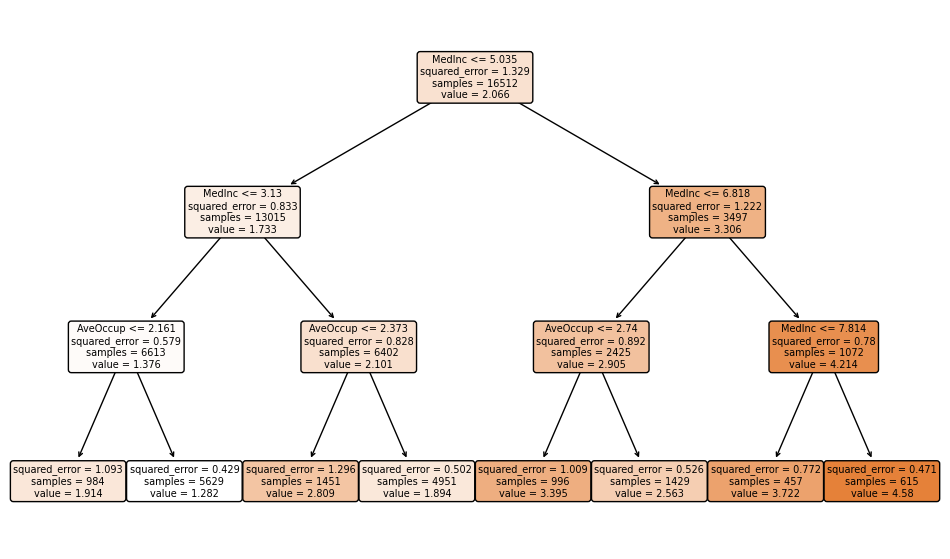

In [ ]:
# Выведем схему:
plt.figure(figsize=(12,7))
tree.plot_tree(model_tree_viz, feature_names=data.feature_names, filled=True, rounded=True)
plt.show()

В учебных целях можно посмотреть, какова точность модели для дерева с глубиной = 3:

In [ ]:
tree_score_depth = model_tree_viz.score(X_train, y_train)
tree_score_depth

0.5325150043124786

Точность на 10% меньше, чем в случае параметров по умолчанию.

**7. Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.**

Оптимизацию выполним с помощью кросс-валидации (инструмент GridSearchCV библиотеки sklearn).

Оптимизируемые параметры: глубина дерева и минимальное количество листьев.

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [ ]:
# Оптимизируемые параметры и диапазоны их значений, из которых будут выбраны оптимальные:
optim_param = {'max_depth':range(1,10), 'min_samples_leaf':range(5,20)}

In [ ]:
# Задание параметров кросс-валидации:
tree_grid = GridSearchCV(model_tree, optim_param, cv=7, n_jobs=-1, verbose=True)

In [ ]:
tree_grid.fit(X_train, y_train)

Fitting 7 folds for each of 135 candidates, totalling 945 fits


GridSearchCV(cv=7, estimator=DecisionTreeRegressor(random_state=9), n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(5, 20)},
             verbose=True)

In [ ]:
tree_grid.best_params_

{'max_depth': 9, 'min_samples_leaf': 18}

Оптимальная глубина дерева: 9, минимальное количество листьев: 18.

Создадим еще одну модель дерева решений с оптимальными параметрами.

In [ ]:
model_tree_optim = DecisionTreeRegressor(max_depth=9, min_samples_leaf=18, random_state=9)

In [ ]:
model_tree_optim.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=18, random_state=9)

**a. Повторите п. 5 для полученной модели.**

In [ ]:
model_tree_optim.predict(X_test)

array([2.02296774, 2.33348176, 0.81872254, ..., 1.44925   , 1.63751288,
       0.64186667])

In [ ]:
tree_scere_opt = model_tree_optim.score(X_test, y_test)
tree_scere_opt

0.7314393154764227

Точность увеличилась еще на 10%.

**8. Сформулируйте выводы по проделанной работе.**

В процессе выполнения заданий получены навыки создания модели "Дерево решений", настройки параметров модели и их оптимизации с помощью кросс-валидации, оценки качества модели, а также визуализации полученного дерева в виде текстовой формы и схемы.   

  **a. Сравните точность двух моделей.**

Сведем метрики всех созданных в работе моделей (их получилось 4) в единую таблицу.

In [ ]:
pd.DataFrame({'Model':['Linear Regression', 'Decision Tree', 'Decision Tree (depth=3)', 'Decision Tree Optimized'], 'Score_test':[lr_score, tree_score, tree_score_depth, tree_scere_opt]})

,Model,Score_test
0,Linear Regression,0.574325
1,Decision Tree,0.632948
2,Decision Tree (depth=3),0.532515
3,Decision Tree Optimized,0.731439


Как и ожидалось, самая высокая точность (73%) у оптимизированной с помощью кросс-валидации модели. При параметрах дерева решений, равных параметрам по умолчанию, скор на 10% ниже.

Метрика дерева решений для случая, когда глубина задана вручную и очень небольшая (равная 3, когда оптимальная равна 9), самая низкая, ниже метрики 'плохой' модели линейной регрессии (т.к. предварительная подготовка данных не была выполнена в необходимом для линейной регрессии объеме). Данный факт подтверждает ценность кросс-валидации для оптимизации параметров модели дерева решений.

  **b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?**

Чтобы получить приемлемую точность, модель линейной регрессии требует более объемной, чем дерево решений, предварительной подготовки данных, что означает увеличение временных затрат, количества строк кода и т.д. Однако качественно построенная линейная регрессия менее склонна к переобучению и дает при прочих равных большую точность на тестовой выборке.

Дерево решений удобно своей наглядностью, меньшей требовательностью к предварительной подготовке данных (кроме обработки пропусков), однако более склонно к переобучению. Кроме того, для качественной работы алгоритма дерева решений, необходима оптимизация его параметров (например, с помощью кросс-валидации).

Таким образом, при решении задач регрессии, для построения качественных предсказаний, лучше подойдет модель линейной регрессии; для случаев, когда результат нужен быстро, для наглядной демонстрации работы модели, больше подойдет дерево решений.